In [1]:
# Import necessary packages/libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import scipy

# Task 1 - Data Familiarization

- **CRIM** - per capita crime rate by town
- **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS** - proportion of non-retail business acres per town.
- **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX** - nitric oxides concentration (parts per 10 million)
- **RM** - average number of rooms per dwelling
- **AGE** - proportion of owner-occupied units built prior to 1940
- **DIS** - weighted distances to five Boston employment centres
- **RAD** - index of accessibility to radial highways
- **TAX** - full-value property-tax rate per \\$10,000
- **PTRATIO** - pupil-teacher ratio by town
- **LSTAT** - % lower status of the population
- **MEDV** - Median value of owner-occupied homes in $1000's

# Task 2 - Watson Studio

##### Taks not needed to complete assignment; skipped

# Task 3 - Import Data

In [2]:
# Import the data and reformat into a pandas dataframe
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)
boston_df.drop(columns=(boston_df.columns[0]))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 4 - Statistics & Visualizations

#### 1. Boxplot of "Median value of owner-occupied homes"

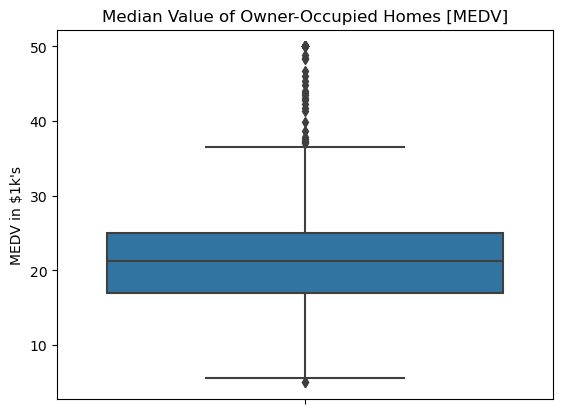

In [4]:
# Create plot
plot1 = sns.boxplot(y='MEDV', data=boston_df)
plot1 = plot1.set(ylabel ="MEDV in $1k's",title='Median Value of Owner-Occupied Homes [MEDV]')
plt.show()

In [5]:
# Review relevant statistics
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

##### <span style="color:blue">Explanation of findings:</span>
<span style="color:blue">The box plot and summary statistics show that, for the sample of 506 housing tracts/towns, the median price is \\$21.2k, and half of the data is found between \\$17.0k and \\$25.0k.  The average home price is ~\\$22.5k, with a standard deviation of ~\\$9.2k. There are numerous outliers on the higher end of the data, with a small number on the lower end.  The range of homes prices spans a "length" of \\$45k.</span>

#### 2. Bar Plot of Charles river variable

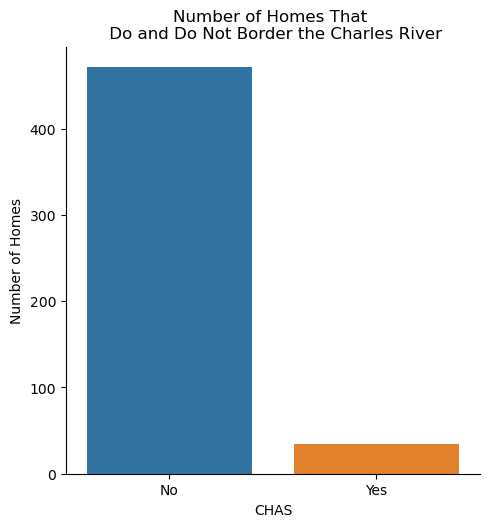

Number Bordering: 35 ( 6.92 %)
Number Not Bordering: 471 ( 93.08 %)


In [6]:
# Create plot
plot2 = sns.catplot(x='CHAS', kind='count', data=boston_df[['CHAS']].replace({1:"Yes",0:"No"}))
plot2 = plot2.set(ylabel ="Number of Homes", title='Number of Homes That \n Do and Do Not Border the Charles River')
plt.show()

# Focus on relevant statistics
nb = boston_df[boston_df['CHAS']==1]['CHAS'].count()
nnb = boston_df[boston_df['CHAS']==0]['CHAS'].count()
print("Number Bordering:",nb,"(",round(nb/(nb+nnb)*100,2),"%)")
print("Number Not Bordering:",nnb,"(",round(nnb/(nb+nnb)*100,2),"%)")

##### <span style="color:blue">Explanation of findings:</span>
<span style="color:blue">The chart and summary count statistics shows that there are very few housing tracts (35, or less than 7%) in the sample that border the Charles River; the vast majority (471, or ~93%) do not.
</span>

### 3. Box Plot of MEDV variable vs the (discretized) AGE variable

In [7]:
# Discretize the age variable into three groups of 35 years and younger, 
# between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = 'Less than 35'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = '35 to 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = 'Greater than 70'

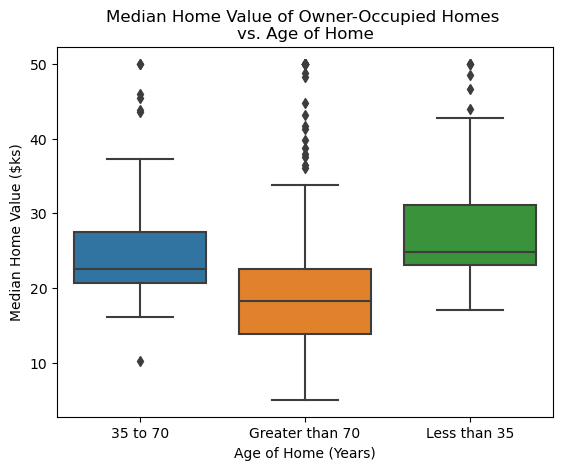

In [8]:
# Create plot
plot3 = sns.boxplot(x="age_group", y="MEDV", data=boston_df)
plot3.set(xlabel="Age of Home (Years)", ylabel="Median Home Value ($ks)",
          title='Median Home Value of Owner-Occupied Homes \nvs. Age of Home')
plt.show()

In [9]:
# View relevant statistics
age_groups = list(boston_df['age_group'].unique())
boston_df.groupby('age_group').agg('MEDV').describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
35 to 70,128.0,24.947656,6.969370,10.2,20.675,22.6,27.425,50.0
Greater than 70,287.0,19.793380,9.515375,5.0,13.800,18.2,22.550,50.0
Less than 35,91.0,27.775824,7.638198,17.1,23.050,24.8,31.150,50.0


##### <span style="color:blue">Explanation of findings:</span>
<span style="color:blue">The age variable does appear to have an effect on the median home value in a given tract.  We can see that as the housing tract gets older, its average of the median home values decreases, as does the median (of the median home values).  It is no surprise that older homes/housing tracts are not worth quite as much.  The quarter ranges start and end higher in an absolute sense the younger the age group, but the variance and IQR are tighter for the middle age group compared to the youngest and oldest groups.</span>

### 4. Scatter plot - Proportion of non-retail business acres per town vs. Nitric Oxide Concentrations

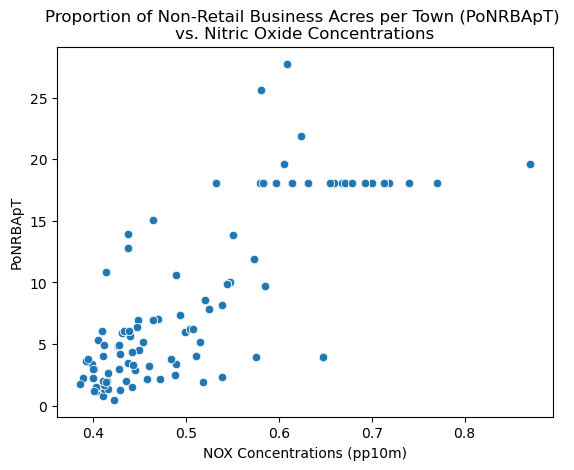

In [10]:
# Create plot
plot4 = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plot4.set(ylabel="PoNRBApT", xlabel="NOX Concentrations (pp10m)",
          title='Proportion of Non-Retail Business Acres per Town (PoNRBApT) \nvs. Nitric Oxide Concentrations')
plt.show()

##### <span style="color:blue">Explanation of findings:</span>
<span style="color:blue">The Proportion of Non-Retail Business Acres per Town (PoNRBApT) does appears to be positively (and roughly linearly) correlated with NOX concentrations.  That is, the higher the NOX concentartion, the higher the proportion of the town that is non-retail business acres. If any causation exists, it is likely not captured by this graph.  I would suspect that NOX conentrations are in fact a product of increases non-retail business activities; in other words, they are an indicator and not a culprit.</span>

### 5. Histogram of Pupil-to-teacher Ratio variable

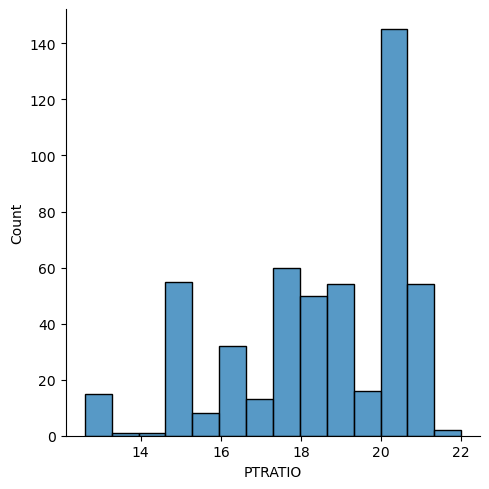

In [11]:
# Create plot
plot5 = sns.displot(boston_df['PTRATIO'], kde = False)
plt.show()

In [12]:
# Review relevant statistics
boston_df['PTRATIO'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

##### <span style="color:blue">Explanation of findings:</span>
<span style="color:blue">The histogram shows a distribution that is slightly skewed left, with a median at 19 (19:1, pupils to teacher).  The mean is closer to 18.  The mode is clearly at about; that is the most common ratio.  Relatively few tracts had a ratio above the median, with the 75% mark landing at roughly 20.  </span>

# Task 5 - Hypothesis Testing

**QUESTION \#1**: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**HYPOTHESIS**: $H\_0: μ\_bounded = μ\_unbounded$ (The average of the median home value for homes bounded by the Charles River is not different than the average median home value for homes not bounded by the Charles River)

**ALTERNATIVE HYPOTHESIS**: $H\_A: μ\_bounded$ is not equal to $μ\_unbounded$ (The average of the median home value for homes bounded by the Charles River is different than the average median home value for homes not bounded by the Charles River)

**SIGNIFICANCE LEVEL**: α = 0.05

In [13]:
# Check significance of variance differences
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

<span style="color:blue">Since the p-value is less than 0.05, the variance are not equal, and we will factor this into our t-test</span>

In [14]:
# Perform T Test
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var=False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

#### <span style="color:blue">Conclusion to Question 1</span>
<span style="color:blue">Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough evidence that there is a statistical difference in median home values depending on whether or not the housing tract borders the Charles River.  The answer to the basic question posed above is **YES, THERE IS REASON TO SUSPECT A SIGNIFICANT DIFFERENCE IN MEDIAN HOME PRICE WHEN BOUNDED OR NOT BY THE CHARLES RIVER**</span>

**QUESTION \#2**: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**HYPOTHESIS**: $H\_0: The averages of the median home values, when grouped by AGE, are not signficantly different from one enother.

**ALTERNATIVE HYPOTHESIS**: $H\_A: The averages of the median home values, when grouped by AGE, are signficantly different from one enother.

**SIGNIFICANCE LEVEL**: α = 0.05

In [15]:
# Check significance of variance differences
scipy.stats.levene(boston_df[boston_df['age_group'] == 'Less than 35']['MEDV'],
                   boston_df[boston_df['age_group'] == '35 to 70']['MEDV'], 
                   boston_df[boston_df['age_group'] == 'Greater than 70']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

<span style="color:blue">Since the p-value is greater than 0.05 we can assume equality of variance</span>

In [16]:
# Create new dataframes focused on age group and median home value
thirtyfive_lower = boston_df[boston_df['age_group'] == 'Less than 35']['MEDV']
thrirtyfive_seventy = boston_df[boston_df['age_group'] == '35 to 70']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == 'Greater than 70']['MEDV']

In [17]:
#Perform ANOVA tests
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thrirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### <span style="color:blue">Conclusion to Question 2</span>
<span style="color:blue">Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means for the median home values when grouped by their age differ.   The answer to the question is **YES, THERE IS REASON TO SUSPECT THAT THE 'AGE' CATEGORY GROUPS HAVE SIGNIFICANTLY DIFFERENT MEDIAN HOME VALUES.**</span>

**QUESTION \#3**: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**HYPOTHESIS**: $H\_0:$ Nitric Oxide Concentrations are not correlated with proportion of non-retail business acres per town

**ALTERNATIVE HYPOTHESIS**:$H\_A:$ Nitric Oxide Concentrations are correlated with proportion of non-retail business acres per town

**SIGNIFICANCE LEVEL**: α = 0.05

In [19]:
# Run Pearson Test
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUs'])

KeyError: 'INDUs'

#### <span style="color:blue">Conclusion to Question 3</span>
<span style="color:blue">The p-value is extremely small; this gives us reason to reject the null hypothesis that these two values are not correlated.  The answer to the core question is **NO, THERE IS REASON TO SUSPECT THAT THE NITROUS OXIDE CONCENTRATIONS ARE CORRELATED WITH THE PROPORTION OF NON-RETAIL BUSINESS ACRES PER TOWN**.</span>

**QUESTION \#4**: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**HYPOTHESIS**: $H\_0: β1$ = 0 (The weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes).

**ALTERNATIVE HYPOTHESIS**: $H\_A: β1$ is not equal to 0 (The weighted distance to the five Boston employment centres has a significant impact on the median value of owner occupied homes).

**SIGNIFICANCE LEVEL**: α = 0.05

In [20]:
# Setup and run Regression Analysis
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        15:06:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <span style="color:blue">Conclusion to Question 4</span>
<span style="color:blue">The coefficient related to the DIS independent variable is 1.0916.  The p-value associated with this value is very small, so there is reason to reject the null hypothesis that the weighted distance to the five main Boston employment centers has no impact on the median home value.  It also indicates-- and this answers the question-- that **FOR EVERY UNIT INCREASE IN DIS, THE MEDIAN HOME VALUE INCREASES BY NEARLY \$1,000**.  The correlation coefficient of roughly 0.24 also indicates that these two values are correlated.</span>